## Домашнее задание к лекции «Понятие класса»

### Задание 1
Напишите функцию, которая возвращает название валюты (поле ‘Name’) с максимальным значением курса  
с помощью сервиса https://www.cbr-xml-daily.ru/daily_json.js

In [1]:
import requests

def max_rate_currency_name():
    try:
        currencies = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    except:
        return None
    name = ''
    value = 0
    for code, info in currencies.items():
        if (code != "XDR") and (info['Value'] > value):
            value = info['Value']
            name = info['Name']
    return name

In [2]:
max_rate_currency_name()

'Фунт стерлингов Соединенного королевства'

### Задание 2
Добавьте в класс Rate параметр diff (со значениями True или False), который в случае значения True в методах курсов валют (eur, usd итд) будет возвращать не курс валюты, а изменение по сравнению в прошлым значением. Считайте, self.diff будет принимать значение True только при возврате значения курса. При отображении всей информации о валюте он не используется.

In [3]:
class Rate:
    def __init__(self, format_='value', diff_=False):
        self.format = format_
        self.diff = diff_
    
    def exchange_rates(self):
        self.r = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
        return self.r.json()['Valute']
    
    def make_format(self, currency):
        response = self.exchange_rates()
        if currency in response:
            if self.format == 'full':
                return response[currency]
            if self.format == 'value':
                if self.diff == False:
                    return response[currency]['Value']
                if self.diff == True:
                    return round(response[currency]['Value'] - response[currency]['Previous'], 4)
        return 'Error'

    def usd(self):
        return self.make_format('USD')
    
    def brl(self):
        return self.make_format('BRL')

In [4]:
r = Rate()
r.brl()

14.2233

In [5]:
r.diff = True
r.brl()

0.0445

### Задание 3
Напишите класс Designer, который учитывает количество международных премий. Подсказки в коде занятия в разделе “Домашнее задание задача 3”.

#### Комментарий по классу Designer такой:
Напишите класс Designer, который учитывает количество международных премий для дизайнеров (из презентации: “Повышение на 1 грейд за каждые 7 баллов. Получение международной премии – это +2 балла”). Считайте, что при выходе на работу сотрудник уже имеет две премии и их количество не меняется со стажем (конечно если хотите это можно вручную менять).

Класс Designer пишется по аналогии с классом Developer из материалов занятия. Комментарий про его условия Вика написала выше: “Повышение на 1 грейд за каждые 7 баллов. Получение международной премии – это +2 балла”

In [6]:
class Employee:
    def __init__(self, name, seniority):
        self.name = name
        self.seniority = seniority
        self.grade = 1
    
    def grade_up(self):
        self.grade += 1
    
    def publish_grade(self):
        print(self.name, self.grade)
    
    def check_if_it_is_time_for_upgrade(self):
        pass

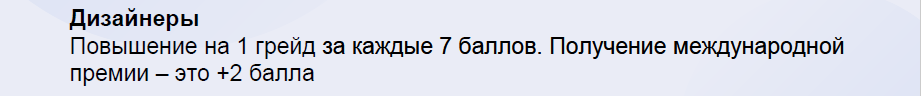

In [7]:
class Designer(Employee):
    def __init__(self, name, seniority):
        super().__init__(name, seniority)
        
        self.international_awards = 0
        
    def check_if_it_is_time_for_upgrade(self):
        self.seniority += 1
        if self.seniority % 7 == 0:
            self.grade_up()
            
        return self.publish_grade()
    
    def get_international_award(self):
        for _ in range(2):
            self.seniority += 1      
            if self.seniority % 7 == 0:
                self.grade_up()
                #self.publish_grade()
                
        self.international_awards += 1

In [8]:
Artemiy = Designer('Артемий', 6)

In [9]:
Artemiy.get_international_award()

In [10]:
print(Artemiy.grade)
print(Artemiy.international_awards)

2
1
